In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import cv2
import csv
from numpy import genfromtxt
import mpmath
import sys
from sklearn.cluster import KMeans
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import itertools
from toolz import unique

In [2]:
def get_bounding_box(image):
    LP = cv2.imread(image,0)
    median_LP = cv2.GaussianBlur(LP,(5,5),0)
    CannyEdge_LP = cv2.Canny(median_LP , 200 , 250)

    LP_show_contours = LP.copy()
    contours, hierarchy=cv2.findContours(CannyEdge_LP.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(LP_show_contours,(x,y),(x+w,y+h),2)

    # define constrain of bounding box 
    bounding_height_constraint = LP.shape[0] * 0.2
    bounding_width_constraint = LP.shape[1] * 0.05

    # find letter that satisfied the contrain
    bounding_box = []
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        if (w >= bounding_width_constraint and h >= bounding_height_constraint):
            bounding_box.append([x-1,y-1,w+1,h+1])

    LP_show_box = LP.copy()

    for c in bounding_box:
        x,y,w,h = c
        cv2.rectangle(CannyEdge_LP,(x,y),(x+w,y+h),1)
    #     plt.imshow(CannyEdge_LP, cmap = 'gray')
    #     plt.show()

    # remove the duplicate
    bounding_box.sort()
    bounding_box = [bounding_box[i] for i in range(len(bounding_box)) if i == 0 or bounding_box[i] != bounding_box[i-1]]
    
    return bounding_box , CannyEdge_LP

In [3]:
# 2. x-box horizontal position of box (integer)
# 3. y-box vertical position of box (integer)
# 4. width width of box (integer)
# 5. high height of box (integer)
# 6. onpix total # on pixels (integer)
# 7. x-bar mean x of on pixels in box (integer)
# 8. y-bar mean y of on pixels in box (integer)
# 9. x2bar mean x variance (integer)
# 10. y2bar mean y variance (integer)
# 11. xybar mean x y correlation (integer)
# 12. x2ybr mean of x * x * y (integer)
# 13. xy2br mean of x * y * y (integer)
# 14. x-ege mean edge count left to right (integer)
# 15. xegvy correlation of x-ege with y (integer)
# 16. y-ege mean edge count bottom to top (integer)
# 17. yegvx correlation of y-ege with x (integer)

def feature_engineering(image, bounding_box):
    x,y,w,h = bounding_box
    onpix = 0
    total_x_bar = 0;
    total_y_bar = 0;
    for i in range(x+w):
        for j in range(y+h):
            if (image[j][i] == 255):
                onpix = onpix + 1;
                total_x_bar = total_x_bar + (i - x);
                total_y_bar = total_y_bar + (j - y);
    
    total_x_variance = 0;
    total_y_variance = 0;
    for i in range(x+w):
        for j in range(y+h):
            if (image[j][i] == 255):
                total_x_variance = total_x_variance + ( ((i - x) - total_x_bar) * ((i - x) - total_x_bar) )
                total_y_variance = total_y_variance + ( ((j - y) - total_y_bar) * ((j - y) - total_y_bar) )
    
    
    x_bar = total_x_bar / onpix
    y_bar = total_y_bar / onpix
    x2bar = total_x_variance / onpix
    y2bar = total_y_variance / onpix
                
    return (onpix , x_bar , y_bar , x2bar , y2bar)

In [4]:
train = []

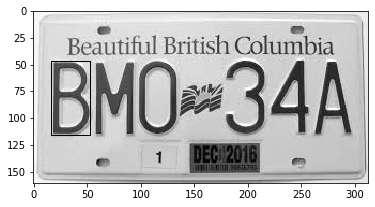

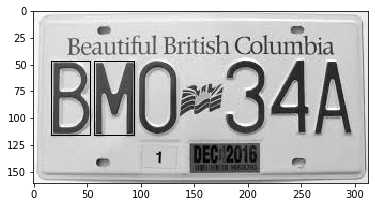

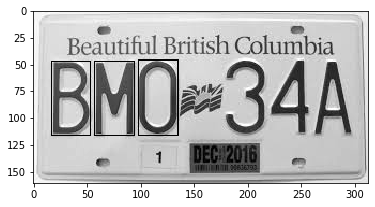

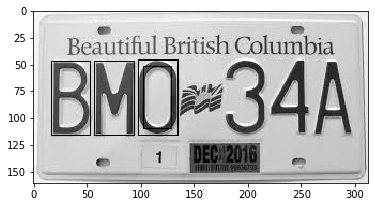

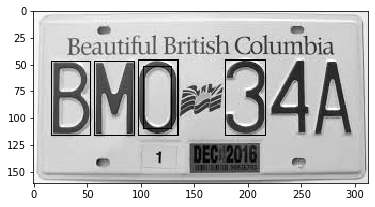

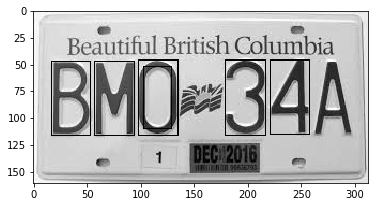

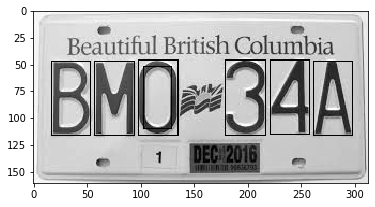

[[17, 47, 36, 69],
 [57, 47, 37, 69],
 [98, 46, 37, 70],
 [103, 52, 26, 58],
 [179, 46, 38, 70],
 [221, 46, 37, 69],
 [262, 47, 36, 69]]

In [5]:
LP = cv2.imread('images/1.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/1.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "B"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "M"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "0"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "3"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "4"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "A"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [6]:
LP = cv2.imread('images/2.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/2.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "8"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "9"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "6"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "R"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "E"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "N"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [7]:
LP = cv2.imread('images/3.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/3.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "2"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "4"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "E"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "K"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "A"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(CannyEdge_LP,(x,y),(x+w,y+h),1)
#     plt.imshow(CannyEdge_LP, cmap = 'gray')
#     plt.show()
# bounding_box

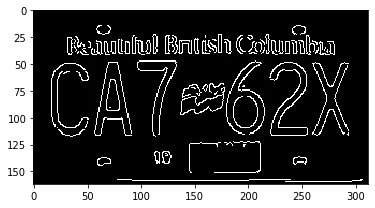

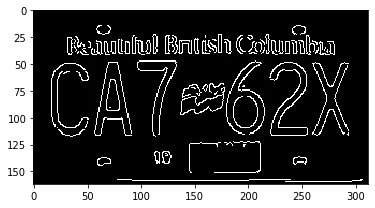

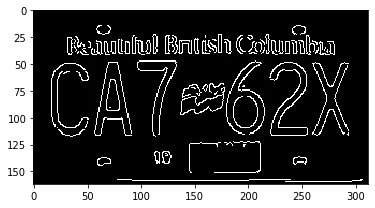

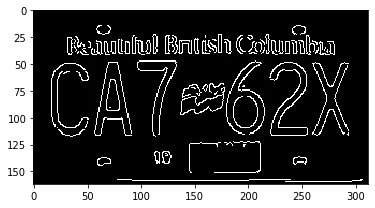

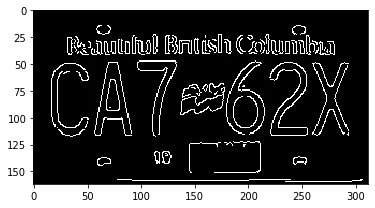

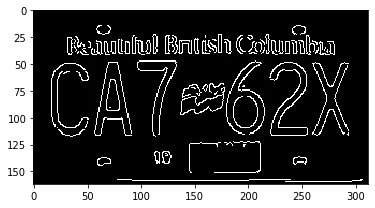

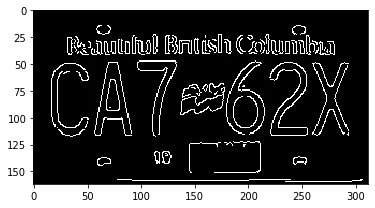

[[16, 48, 37, 70],
 [21, 56, 31, 54],
 [56, 47, 36, 70],
 [96, 46, 38, 72],
 [179, 46, 37, 70],
 [219, 47, 37, 70],
 [259, 47, 35, 70]]

In [28]:
LP = cv2.imread('images/4.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/4.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "C"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "A"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "7"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "6"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "2"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "X"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(CannyEdge_LP,(x,y),(x+w,y+h),1)
#     plt.imshow(CannyEdge_LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [9]:
LP = cv2.imread('images/5.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/5.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "8"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "2"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "0"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "T"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "T"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "E"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [10]:
LP = cv2.imread('images/6.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/6.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "D"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "E"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "3"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "0"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [11]:
LP = cv2.imread('images/7.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/7.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "N"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "D"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "J"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "9"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "0"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[8])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "2"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [12]:
LP = cv2.imread('images/8.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/8.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "P"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "K"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "5"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "9"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "5"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "K"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [13]:
LP = cv2.imread('images/10.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/10.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "M"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "B"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "G"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "0"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "9"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [14]:
LP = cv2.imread('images/11.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/11.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "6"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "5"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "3"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "N"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "X"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "X"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "H"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [15]:
LP = cv2.imread('images/12.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/12.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "4"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "6"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "A"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "K"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "S"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [16]:
LP = cv2.imread('images/15.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/15.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "1"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [17]:
LP = cv2.imread('images/17.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/17.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "0"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "5"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "9"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "N"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "X"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "C"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [18]:
LP = cv2.imread('images/18.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/18.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "C"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "D"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "7"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "7"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "2"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [19]:
LP = cv2.imread('images/19.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/19.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "M"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "L"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "6"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "4"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "6"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "9"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [20]:
LP = cv2.imread('images/20.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/20.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "J"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "J"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "J"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[7])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "2"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[9])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "5"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[10])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "$"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [21]:
LP = cv2.imread('images/21.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/21.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "Y"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "2"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "8"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "6"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "1"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "3"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [22]:
LP = cv2.imread('images/22.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/22.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "2"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "4"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "5"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "A"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "F"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "C"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [23]:
LP = cv2.imread('images/23.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/23.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "B"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "E"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "8"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "9"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "0"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[6])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "2"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [24]:
LP = cv2.imread('images/24.jpeg',0)
bounding_box , CannyEdge_LP = get_bounding_box('images/24.jpeg')
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[0])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "R"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[1])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "T"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[2])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "A"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[3])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "6"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[4])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "8"))
train.append(list_feature)
(onpix , x_bar , y_bar , x2ybr , xy2br) = feature_engineering(CannyEdge_LP , bounding_box[5])
list_feature = list((onpix , x_bar , y_bar , x2ybr , xy2br , "9"))
train.append(list_feature)
# for c in bounding_box:
#     x,y,w,h = c
#     cv2.rectangle(LP,(x,y),(x+w,y+h),1)
#     plt.imshow(LP, cmap = 'gray')
#     plt.show()
# bounding_box

In [25]:
train = pd.DataFrame(train , columns = ["onpix" , "x_bar" , "y_bar" , "x2ybr", "xy2br" , "letter"])

In [26]:
train.to_csv("train.csv" , index = False)